In [1]:
import cv2
import numpy as np
import requests
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [2]:
train_dir = 'Face Mask Dataset/Train'
test_dir = 'Face Mask Dataset/Test'
val_dir = 'Face Mask Dataset/Validation'

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [3]:
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3))
for layer in mobilenet.layers:
    layer.trainable = False
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 40962     
Total params: 2,298,946
Trainable params: 40,962
Non-trainable params: 2,257,984
_________________________________________________________________


In [4]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator)//32,epochs=9,validation_data=val_generator,validation_steps=len(val_generator)//32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/9
9/9 [==============================] - 4s 492ms/step - loss: 0.1485 - accuracy: 0.9340
Epoch 2/9
9/9 [==============================] - 4s 457ms/step - loss: 0.0740 - accuracy: 0.9861
Epoch 3/9
9/9 [==============================] - 4s 458ms/step - loss: 0.0430 - accuracy: 0.9861
Epoch 4/9
9/9 [==============================] - 4s 460ms/step - loss: 0.0608 - accuracy: 0.9792
Epoch 5/9
9/9 [==============================] - 4s 447ms/step - loss: 0.0491 - accuracy: 0.9931
Epoch 6/9
9/9 [==============================] - 4s 451ms/step - loss: 0.1989 - accuracy: 0.9653
Epoch 7/9
9/9 [==============================] - 4s 483ms/step - loss: 0.1276 - accuracy: 0.9653
Epoch 8/9
9/9 [==============================] - 4s 466ms/step - loss: 0.0779 - accuracy: 0.9826
Epoch 9/9
9/9 [==============================] - 4s 473ms/step - loss: 0.0523 - accuracy: 0.9896


In [5]:
model.evaluate_generator(test_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.03207050636410713, 0.9925000071525574]

Mask On


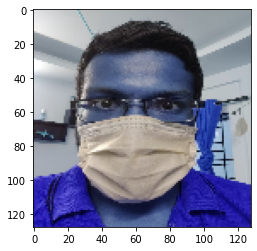

In [6]:
sample_mask_img = cv2.imread('Mine 2.jpeg')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
rest=model.predict(sample_mask_img)
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}
if(rest[0][0]>rest[0][1]):
    print("Mask On")
else:
    print("Mask Off")

In [30]:
cap = cv2.VideoCapture(0)
while True:
    success,img = cap.read()
    sample_mask_img = cv2.resize(img,(128,128))
    sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
    sample_mask_img = sample_mask_img/255.0
    rest=model.predict(sample_mask_img)
    print(rest)
    if(rest[0][0]>rest[0][1]):
        txt="Mask On"
    else:
        txt="Mask Off"
    cv2.putText(img=img,text=txt.upper(),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1,color=(0,255,0),thickness=2,org=(50,50))
    cv2.imshow("Output",img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[9.9999011e-01 7.1443615e-12]]
[[9.9996811e-01 1.0696652e-13]]
[[9.9997079e-01 1.5782545e-12]]
[[9.9989486e-01 6.8441758e-13]]
[[9.9945635e-01 4.0795800e-12]]
[[9.9991977e-01 1.3224162e-12]]
[[9.9997663e-01 7.6898026e-13]]
[[9.9995691e-01 2.9517916e-12]]
[[9.9998206e-01 3.9312244e-13]]
[[9.9999017e-01 2.4890203e-13]]
[[9.9996901e-01 1.8397755e-12]]
[[9.9998647e-01 2.1985907e-12]]
[[9.9985778e-01 4.1353128e-12]]
[[9.9982285e-01 2.5169988e-11]]
[[9.9993372e-01 2.4590946e-12]]
[[9.991057e-01 8.220417e-11]]
[[9.9988753e-01 2.1871348e-12]]
[[9.999344e-01 5.689814e-12]]
[[9.9972415e-01 5.3476939e-13]]
[[9.999943e-01 1.285980e-13]]
[[9.9986148e-01 2.0778513e-12]]
[[9.9911416e-01 8.6559183e-11]]
[[9.9979699e-01 2.5087536e-12]]
[[9.999925e-01 2.676924e-12]]
[[9.999858e-01 1.684773e-12]]
[[9.999039e-01 7.949009e-12]]
[[9.9963939e-01 4.6406438e-11]]
[[9.9758571e-01 1.7180948e-11]]
[[9.817362e-01 4.134644e-11]]
[[9.9724120e-01 2.0820574e-11]]
[[9.9975038e-01 1.2881233e-13]]
[[9.9989176e-01 7.5830

[[6.5871942e-01 1.4190677e-08]]
[[8.8617849e-01 6.4876446e-08]]
[[5.3807378e-01 1.2693556e-07]]
[[7.6004219e-01 2.9472618e-09]]
[[5.9325951e-01 1.4935747e-08]]
[[8.741174e-01 6.443099e-09]]
[[9.5887077e-01 5.6169416e-09]]
[[9.2761093e-01 2.7978686e-08]]
[[9.7639930e-01 2.2666605e-08]]
[[9.6047628e-01 1.0366173e-08]]
[[9.9539912e-01 5.4982654e-09]]
[[9.8548472e-01 1.6896222e-07]]
[[9.9187791e-01 1.5608116e-07]]
[[9.8626792e-01 3.4894754e-07]]
[[9.5389688e-01 1.9148658e-06]]
[[9.5554090e-01 1.9021986e-07]]
[[9.7728086e-01 2.1224972e-07]]
[[9.0178072e-01 1.5237114e-06]]
[[9.8387194e-01 6.3534526e-07]]
[[8.6799157e-01 3.2749292e-06]]
[[9.3707871e-01 2.5835395e-06]]
[[9.8345435e-01 1.6651396e-07]]
[[9.0670907e-01 1.2101943e-07]]
[[9.5963478e-01 1.9203796e-06]]
[[9.6276313e-01 7.0592466e-07]]
[[9.9598533e-01 1.4533512e-07]]
[[9.7860718e-01 1.2203614e-06]]
[[8.8560945e-01 3.2215805e-06]]
[[9.7629023e-01 1.4924093e-07]]
[[9.6171498e-01 1.1815702e-06]]
[[9.9011445e-01 3.3436578e-08]]
[[9.734758

[[9.9791354e-01 1.7046116e-10]]
[[9.488181e-01 3.247874e-09]]
[[9.6670568e-01 1.8212425e-09]]
[[9.770194e-01 3.189150e-10]]
[[9.864744e-01 7.340384e-11]]
[[9.7924608e-01 3.5354057e-09]]
[[9.9599081e-01 1.4671278e-11]]
[[9.986794e-01 5.308386e-09]]
[[9.9689448e-01 5.1449314e-11]]
[[9.9556041e-01 2.0652189e-07]]
[[9.8943388e-01 1.4231308e-08]]
[[9.9962270e-01 2.3940955e-10]]
[[9.9926758e-01 1.2837575e-09]]
[[9.9951673e-01 4.7580867e-10]]
[[9.9328500e-01 2.9359284e-09]]
[[9.9867094e-01 3.7101437e-09]]
[[9.7076929e-01 9.2570457e-07]]
[[9.9966437e-01 2.3671618e-09]]
[[9.9285793e-01 3.0731007e-10]]
[[8.9089054e-01 5.9231526e-09]]
[[9.5988184e-01 7.4814388e-10]]
[[9.6424717e-01 1.5491008e-09]]
[[9.8864275e-01 1.5349561e-10]]
[[9.9961466e-01 1.7215335e-10]]
[[9.8468578e-01 1.1742352e-09]]
[[9.9038100e-01 2.7549736e-09]]
[[9.8442817e-01 2.6681974e-08]]
[[9.9727589e-01 1.3572333e-08]]
[[9.9498904e-01 2.1681164e-08]]
[[9.9865830e-01 2.2883881e-09]]
[[9.8500752e-01 2.9126044e-08]]
[[9.9838114e-01 

[[0.22716612 0.09881163]]
[[0.14032939 0.02037805]]
[[0.16476333 0.00772357]]
[[0.05827475 0.12103859]]
[[0.02551177 0.15737468]]
[[0.0427148  0.04353854]]
[[0.13557911 0.01289469]]
[[0.05325082 0.01103178]]
[[0.035795   0.01972455]]
[[0.06245381 0.0310398 ]]
[[0.06735113 0.05378854]]
[[0.04806003 0.00734988]]
[[0.0110862 0.2985401]]
[[0.01593676 0.17341909]]
[[0.05465835 0.04157361]]
[[0.11806118 0.05588233]]
[[0.15042141 0.03280729]]
[[0.17763788 0.02725053]]
[[0.35510436 0.01649967]]
[[0.32432163 0.02518612]]
[[0.29312623 0.00746444]]
[[0.17658311 0.05653659]]
[[0.22144023 0.01918441]]
[[0.22198391 0.01951465]]
[[0.18502986 0.0093143 ]]
[[0.14903781 0.00145671]]
[[0.04552913 0.02209523]]
[[0.1787979  0.00119984]]
[[0.05594394 0.02424142]]
[[0.12812674 0.00972873]]
[[0.35998544 0.00215954]]
[[5.9051251e-01 1.7979741e-04]]
[[5.9538174e-01 8.5144762e-05]]
[[4.5666686e-01 3.9905310e-04]]
[[0.26349932 0.00168335]]
[[7.0143276e-01 9.9284916e-05]]
[[6.1155576e-01 3.5798550e-04]]
[[0.271832

[[6.764020e-01 6.899364e-05]]
[[1.0000000e+00 3.2249847e-09]]
[[0.58821845 0.02526036]]
[[7.5499511e-01 1.8495676e-08]]
[[8.3271551e-01 7.0313155e-09]]
[[7.9479361e-01 1.8738044e-09]]
[[1.7562771e-01 5.5644279e-08]]
[[9.093210e-02 6.820493e-05]]
[[3.8894963e-01 2.4151802e-04]]
[[1.9252387e-01 3.5578545e-05]]
[[1.5039185e-01 6.0071645e-05]]
[[5.400208e-01 4.157126e-04]]
[[0.09410831 0.0002147 ]]
[[7.3861241e-01 1.2437469e-05]]
[[2.8913376e-01 7.3801381e-08]]
[[8.2689059e-01 3.4110572e-11]]
[[9.774286e-01 3.704571e-13]]
[[9.8898643e-01 1.4087261e-11]]
[[9.9840498e-01 1.8768834e-10]]
[[9.859816e-01 8.603799e-09]]
[[8.1366241e-01 5.5465916e-09]]
[[9.0950930e-01 7.4736474e-11]]
[[9.5620847e-01 1.1685183e-12]]
[[9.6615946e-01 4.8009575e-11]]
[[1.5492982e-01 1.7949265e-05]]
[[0.00995669 0.00034806]]
[[0.05297217 0.00924602]]
[[0.46347538 0.00258458]]
[[0.22133362 0.00289518]]
[[0.29715157 0.00030547]]
[[0.0501096  0.00024912]]
[[2.1564186e-02 6.6607558e-05]]
[[0.03333405 0.00159174]]
[[0.0423

[[9.194731e-01 5.100212e-11]]
[[9.8885167e-01 4.9762725e-11]]
[[9.7241569e-01 2.2579734e-09]]
[[8.4402955e-01 2.3275526e-09]]
[[5.5814999e-01 1.2167118e-07]]
[[6.6911751e-01 3.7106695e-08]]
[[9.203564e-01 6.960103e-09]]
[[9.5163465e-01 2.1347390e-08]]
[[9.6905196e-01 2.5213738e-09]]
[[9.9056089e-01 7.5511697e-10]]
[[9.3898410e-01 1.8397266e-08]]
[[4.47399527e-01 1.18187046e-07]]
[[2.5197494e-01 1.3806519e-07]]
[[9.9182367e-01 1.0417563e-09]]
[[9.8555696e-01 2.1278446e-08]]
[[9.9046230e-01 2.0262176e-08]]
[[9.7020137e-01 4.5990863e-08]]
[[8.8194114e-01 6.8941638e-08]]
[[9.4570506e-01 3.3967518e-07]]
[[6.9370925e-01 4.8011848e-06]]
[[6.8067157e-01 1.2157764e-06]]
[[9.1370046e-01 3.0179888e-07]]
[[9.372299e-01 4.432610e-08]]
[[9.9350905e-01 5.9408372e-09]]
[[7.9677796e-01 1.5209000e-07]]
[[4.5944437e-01 2.8348137e-07]]
[[9.597231e-01 8.264338e-08]]
[[9.3551463e-01 2.5716187e-07]]
[[8.7891608e-01 1.0668755e-06]]
[[8.0219996e-01 3.6718677e-07]]
[[1.6864872e-01 6.7115466e-06]]
[[4.0487874e-0

[[9.9948615e-01 4.5337096e-13]]
[[9.9889964e-01 1.1888547e-12]]
[[9.9751139e-01 1.4536068e-12]]
[[9.9577701e-01 1.6307695e-11]]
[[9.6631485e-01 6.5316121e-11]]
[[9.8859632e-01 1.6853716e-11]]
[[9.5308685e-01 3.0605007e-10]]
[[8.6241972e-01 1.6820656e-09]]
[[9.0420645e-01 1.4315492e-07]]
[[9.9135983e-01 4.3125546e-08]]
[[9.7098768e-01 2.5446232e-08]]
[[7.934780e-01 7.178309e-07]]
[[8.7355244e-01 5.5651896e-07]]
[[9.7865915e-01 8.7141423e-08]]
[[9.9036694e-01 5.7660607e-08]]
[[9.9871778e-01 1.8507806e-07]]
[[9.9821258e-01 3.7760134e-07]]
[[9.7769713e-01 1.1685703e-07]]
[[8.8337201e-01 6.9280813e-06]]
[[7.3798686e-01 9.0846930e-07]]
[[9.2653298e-01 2.7291624e-06]]
[[9.310824e-01 3.439472e-06]]
[[9.4231808e-01 2.0896377e-06]]
[[9.7461355e-01 1.5194655e-06]]
[[9.9985635e-01 7.9823552e-09]]
[[9.9999845e-01 8.0992897e-14]]
[[9.998368e-01 8.470481e-11]]
[[9.9953985e-01 2.3412418e-11]]
[[9.9771917e-01 4.2622932e-09]]
[[9.9958003e-01 7.5035034e-10]]
[[9.9861598e-01 2.2807788e-10]]
[[9.8724812e-0

In [6]:
url="http://10.0.0.8:8080/shot.jpg"
while True:
    img_resp = requests.get(url)
    img_arr=np.array(bytearray(img_resp.content), dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    sample_mask_img = cv2.resize(img,(128,128))
    sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
    sample_mask_img = sample_mask_img/255.0
    rest=model.predict(sample_mask_img)
    print(rest)
    if(rest[0][0]>rest[0][1]):
        txt="Mask On"
        cv2.putText(img=img,text="Mask On".upper(),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1,color=(255,0,0),thickness=2,org=(50,50))

    else:
        txt="Mask Off"
        cv2.putText(img=img,text=txt.upper(),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=1,color=(0,0,255),thickness=2,org=(50,50))

    cv2.imshow("Output",img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[9.720540e-01 1.822054e-05]]
[[2.4110484e-01 1.8018365e-05]]
[[7.4784017e-01 3.0860822e-06]]
[[9.146775e-01 8.545653e-06]]
[[0.06652662 0.00330877]]
[[0.27764082 0.00622946]]
[[9.2211139e-01 1.9133091e-04]]
[[5.2157044e-04 1.1745489e-05]]
[[8.098226e-06 1.138343e-04]]
[[1.9065465e-07 1.2260795e-02]]
[[6.1566851e-07 2.3261368e-02]]
[[0.00015485 0.00013107]]
[[9.9551082e-03 2.0845771e-05]]
[[5.220887e-02 5.101536e-07]]
[[1.9469857e-04 2.2933980e-05]]
[[1.2696475e-02 2.0842192e-07]]
[[1.3093948e-03 6.2206766e-08]]
[[3.8825543e-05 2.3030539e-06]]
[[7.5674355e-03 7.7008713e-07]]
[[1.6604174e-05 3.0185115e-06]]
[[3.5983324e-04 1.0062769e-05]]
[[7.4619263e-02 1.8886531e-08]]
[[2.2998307e-05 6.6116510e-05]]
[[4.9597025e-04 4.4815920e-07]]
[[6.8187714e-04 3.7698067e-09]]
[[1.2331827e-04 1.4079862e-07]]
[[8.6862361e-05 1.2096664e-06]]
[[1.5586317e-03 1.5625414e-08]]
[[1.6072392e-04 1.2230429e-07]]
[[1.5483001e-01 2.4417737e-08]]
[[2.8900802e-02 2.2314893e-08]]
[[7.7143312e-04 1.6701189e-09]]
[[

[[1.7201573e-02 6.0430135e-05]]
[[0.00043228 0.00083697]]
[[0.00027087 0.00040954]]
[[1.6652644e-03 3.2547330e-05]]
[[0.00026146 0.00398365]]
[[0.00203553 0.00011456]]
[[0.000139   0.00481227]]
[[7.6930821e-03 1.0775898e-06]]
[[1.5728474e-02 2.6219479e-06]]
[[0.00614116 0.0013397 ]]
[[0.00051636 0.00107494]]
[[3.9594066e-05 6.2382817e-03]]
[[0.00023091 0.0002951 ]]
[[8.7438246e-05 3.0491650e-03]]
[[5.9187434e-05 7.1263313e-04]]
[[1.7933601e-06 1.7930269e-03]]
[[2.6346952e-05 1.1611754e-01]]
[[9.914309e-03 5.334828e-05]]
[[1.6707182e-04 7.9853826e-06]]
[[9.3731284e-04 1.6130631e-06]]
[[1.3565421e-03 3.0332806e-06]]
[[5.4770708e-04 1.2578816e-06]]
[[6.9819900e-05 1.9017806e-06]]
[[7.2273463e-02 4.9201812e-08]]
[[5.5161283e-05 2.7400008e-06]]
[[5.6641882e-05 6.8573781e-06]]
[[1.5587158e-05 3.2186601e-06]]
[[2.9075146e-04 1.4965398e-05]]
[[1.44284595e-05 2.58922577e-04]]
[[9.9826473e-01 5.2351682e-12]]
[[1.2657293e-05 2.6629063e-05]]
[[1.6119666e-06 1.5034378e-03]]
[[2.5728551e-07 6.196662

[[3.8034326e-01 1.0719390e-08]]
[[1.0234484e-01 3.1861575e-07]]
[[1.2803942e-02 5.6285971e-06]]
[[9.4504762e-01 1.6706327e-08]]
[[8.8085067e-01 1.2811775e-08]]
[[6.7536783e-01 2.2963601e-08]]
[[8.9538366e-01 1.0469818e-08]]
[[9.8743594e-01 3.5824654e-10]]
[[9.8949289e-01 4.8124633e-11]]
[[9.8968208e-01 5.0011667e-10]]
[[9.6278262e-01 1.0750994e-10]]
[[9.992815e-01 7.670123e-11]]
[[1.5040189e-01 4.0552881e-09]]


NameError: name 'cap' is not defined